In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
data.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [36]:
columns = ['sales_channel', 'route', 'trip_type', 'flight_day', 'booking_origin']
for column in columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")
    print()

sales_channel: ['Internet' 'Mobile']

route: ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKKIX' 'CGKKTM' 'CGKMEL' 'CGKMRU' 'CGKOOL'
 'CGKP

In [10]:
# Drop the target column from the features
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

In [11]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Convert categorical variables using one-hot encoding
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

In [13]:
# Align the training and testing sets to have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1)

In [14]:
# Map weekdays to numerical values
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
X_train_encoded['flight_day'] = X_train_encoded['flight_day'].map(weekday_map)
X_test_encoded['flight_day'] = X_test_encoded['flight_day'].map(weekday_map)

In [15]:
# Normalize numerical variables
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
scaler = MinMaxScaler()
X_train_encoded[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

In [16]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

In [17]:
# Create the model
model = RandomForestClassifier()

In [18]:
# Train the model
model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [21]:
# Print Results
print('Random Forest Model Predictions')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Random Forest Model Predictions
Accuracy: 0.85
Precision: 0.49
Recall: 0.17
F1 Score: 0.25


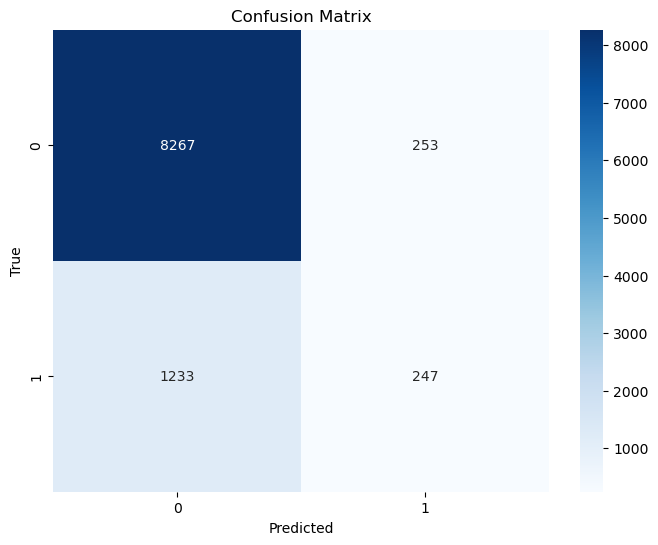

In [22]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.49      0.17      0.25      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.57      0.58     10000
weighted avg       0.81      0.85      0.82     10000



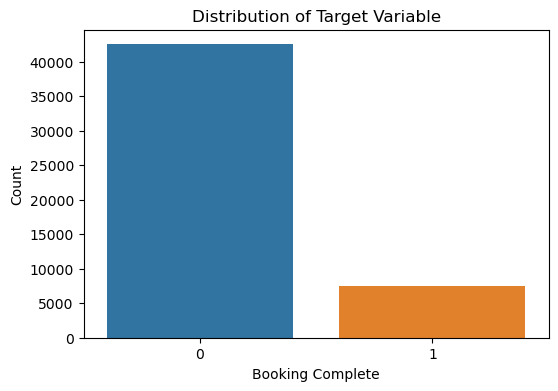

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='booking_complete')
plt.xlabel("Booking Complete")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

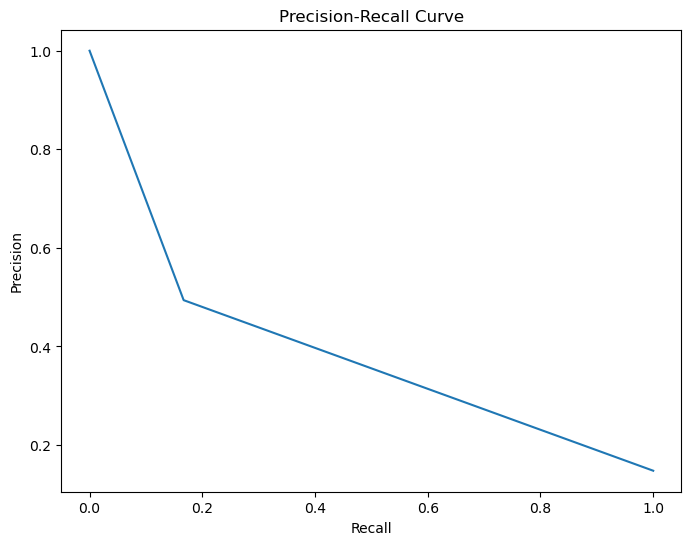

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

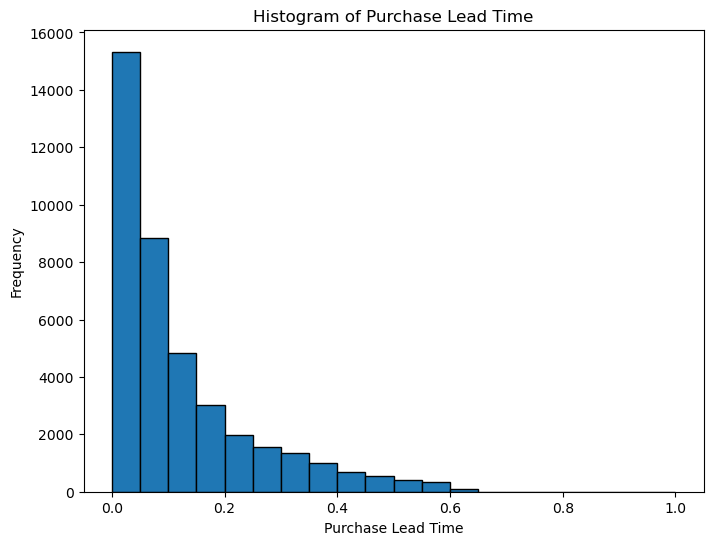

In [26]:
# Histogram of purchase_lead
plt.figure(figsize=(8, 6))
plt.hist(X_train_encoded['purchase_lead'], bins=20, edgecolor='black')
plt.xlabel('Purchase Lead Time')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Lead Time')
plt.show()

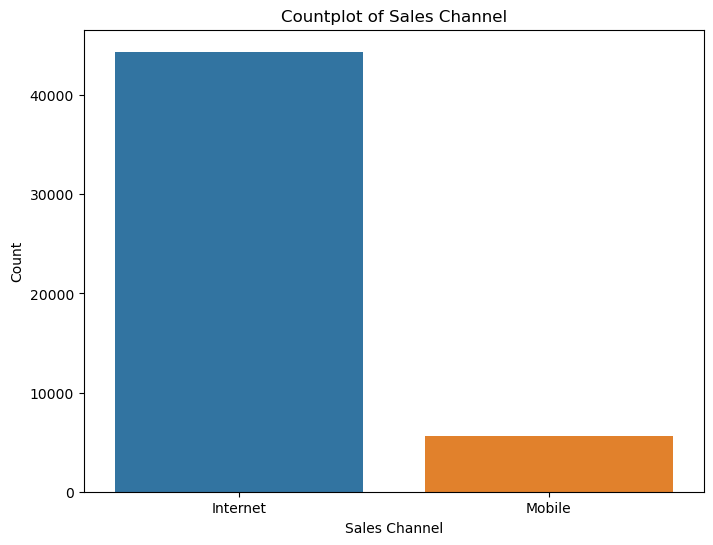

In [27]:
# Countplot of sales_channel
plt.figure(figsize=(8, 6))
sns.countplot(x='sales_channel', data=data)
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Countplot of Sales Channel')
plt.show()

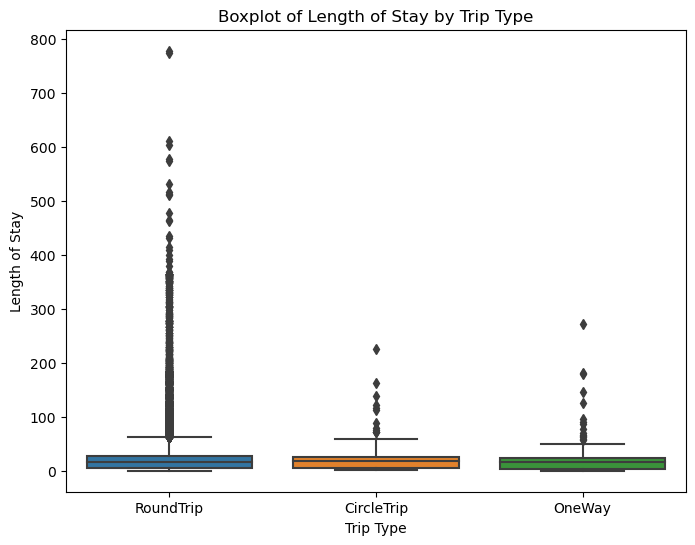

In [28]:
# Boxplot of length_of_stay by trip_type
plt.figure(figsize=(8, 6))
sns.boxplot(x='trip_type', y='length_of_stay', data=data)
plt.xlabel('Trip Type')
plt.ylabel('Length of Stay')
plt.title('Boxplot of Length of Stay by Trip Type')
plt.show()


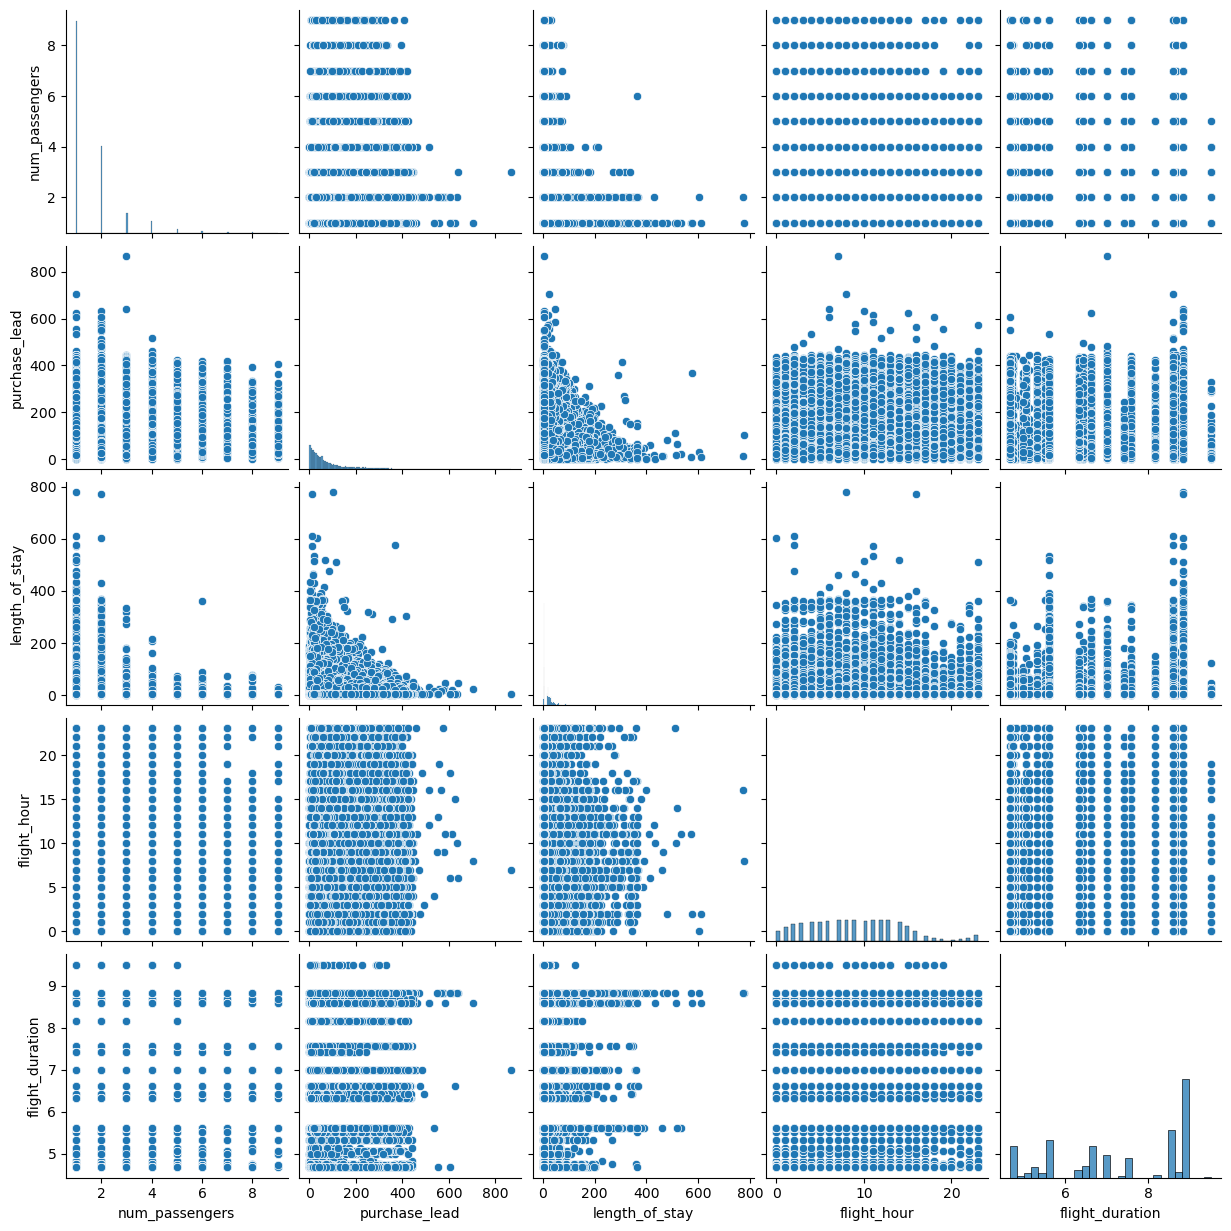

In [29]:
# Pairplot of numerical variables
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
sns.pairplot(data[numerical_cols])
plt.show()

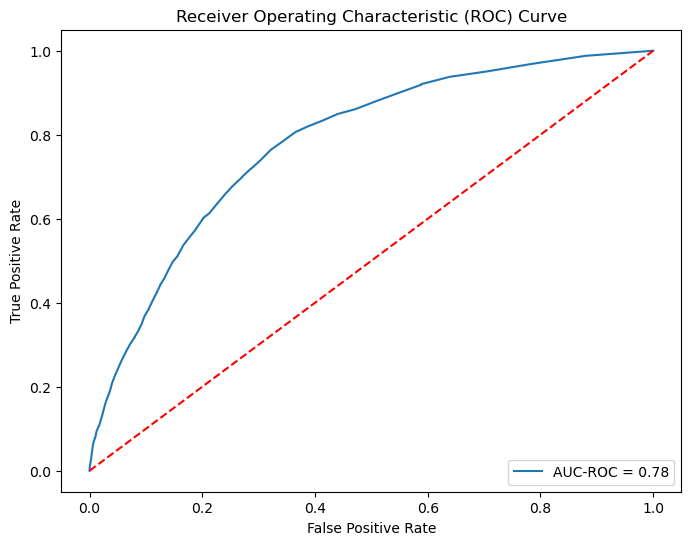

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for each class
y_pred_proba = model.predict_proba(X_test_imputed)
# Extract the probabilities of the positive class
positive_probs = y_pred_proba[:, 1]
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, positive_probs)
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, positive_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

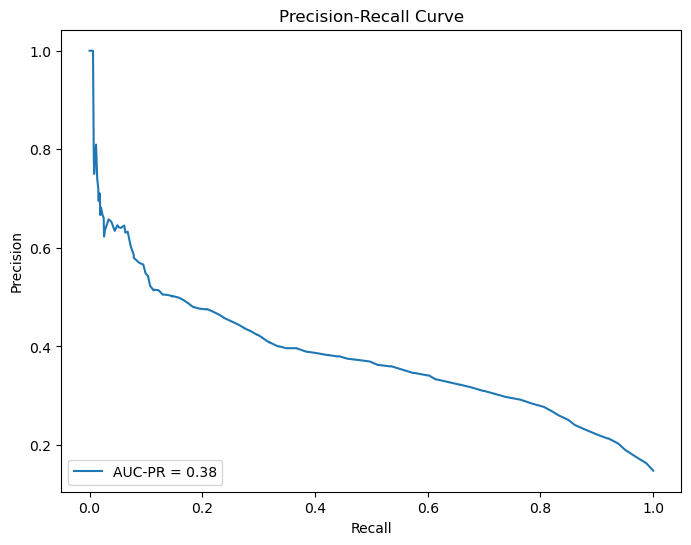

In [33]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, positive_probs)
# Calculate the area under the precision-recall curve
auc_pr = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model.

In [38]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores:
[0.845875 0.8495   0.842375 0.844625 0.854125]
Mean Accuracy: 0.85


Random Forest Model Predictions
Accuracy: 0.85
Precision: 0.50
Recall: 0.17
F1 Score: 0.25


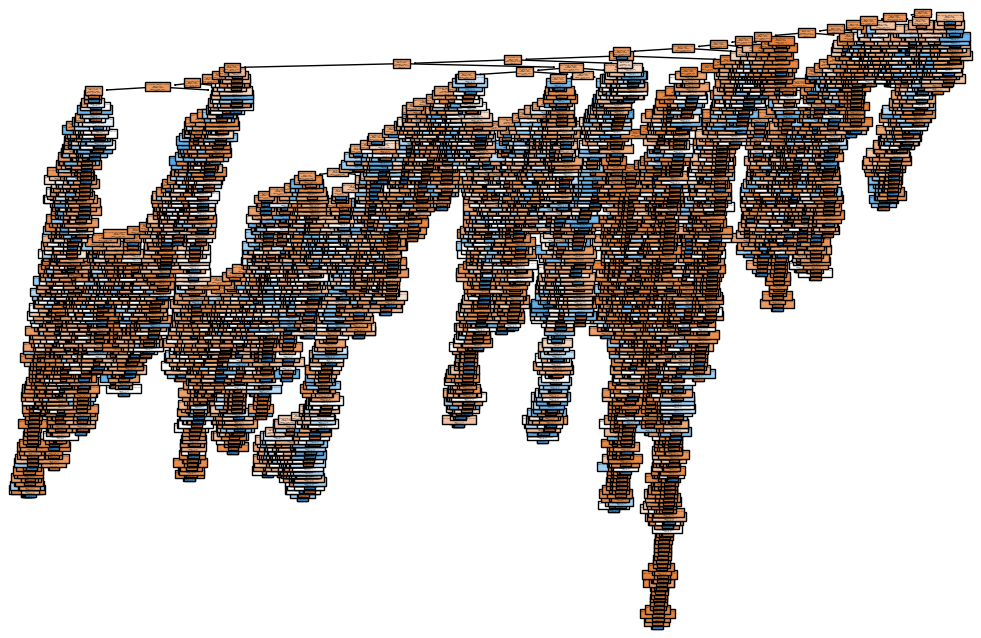

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# Load the dataset
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

# Drop the target column from the features
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables using one-hot encoding
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Align the training and testing sets to have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1)

# Map weekdays to numerical values
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
X_train_encoded['flight_day'] = X_train_encoded['flight_day'].map(weekday_map)
X_test_encoded['flight_day'] = X_test_encoded['flight_day'].map(weekday_map)

# Normalize numerical variables
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
scaler = MinMaxScaler()
X_train_encoded[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# Create the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Results
print('Random Forest Model Predictions')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize a decision tree from the Random Forest
plt.figure(figsize=(12, 8))
tree = model.estimators_[0]  # Choose an individual decision tree from the Random Forest
class_names = [str(c) for c in model.classes_]  # Convert class names to strings
plot_tree(tree, feature_names=X_train_encoded.columns, class_names=class_names, filled=True)
plt.show()